In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ventas_consumo_2024_2025.csv", parse_dates=["Fecha"])
df.head(10)


,Fecha,Producto,Categoria,Canal,Precio_Unitario,Costo_Unitario,Cantidad
0,2024-01-01,Galletitas,Alimentos,Almacen,5000,3500,14
1,2024-01-01,Aceite 900ml,Alimentos,Mayorista,12000,9500,113
2,2024-01-01,Papel Higienico,Higiene,Almacen,18000,13000,118
3,2024-01-01,Papel Higienico,Higiene,Supermercado,18000,13000,59
4,2024-01-01,Detergente,Limpieza,Supermercado,7000,5000,19
5,2024-01-01,Arroz 1kg,Alimentos,Almacen,5500,4200,124
6,2024-01-01,Galletitas,Alimentos,Almacen,5000,3500,179
7,2024-01-01,Detergente,Limpieza,Mayorista,7000,5000,172
8,2024-01-01,Detergente,Limpieza,Mayorista,7000,5000,81
9,2024-01-01,Aceite 900ml,Alimentos,Mayorista,12000,9500,18


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6179 entries, 0 to 6178
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha            6179 non-null   datetime64[us]
 1   Producto         6179 non-null   str           
 2   Categoria        6179 non-null   str           
 3   Canal            6179 non-null   str           
 4   Precio_Unitario  6179 non-null   int64         
 5   Costo_Unitario   6179 non-null   int64         
 6   Cantidad         6179 non-null   int64         
dtypes: datetime64[us](1), int64(3), str(3)
memory usage: 338.0 KB


In [ ]:
#Crear métricas base
df["Ventas"] = df["Precio_Unitario"] * df["Cantidad"]
df["Utilidad"] = (df["Precio_Unitario"] - df["Costo_Unitario"]) * df["Cantidad"]
df["Margen"] = df["Utilidad"] / df["Ventas"]

df.describe()



,Fecha,Precio_Unitario,Costo_Unitario,Cantidad,Ventas,Utilidad,Margen
count,6179,6179.000000,6179.000000,6179.000000,6.179000e+03,6179.000000,6179.000000
mean,2024-12-31 07:00:11.069752,9584.965205,7036.996278,104.599450,1.008470e+06,268187.619356,0.272531
min,2024-01-01 00:00:00,4500.000000,3000.000000,10.000000,4.500000e+04,13000.000000,0.208333
25%,2024-07-01 00:00:00,5000.000000,3500.000000,58.000000,4.150000e+05,114000.000000,0.236364
50%,2025-01-01 00:00:00,7000.000000,5000.000000,104.000000,7.645000e+05,211500.000000,0.277778
75%,2025-07-02 00:00:00,15000.000000,11000.000000,152.000000,1.356000e+06,348000.000000,0.300000
max,2025-12-31 00:00:00,18000.000000,13000.000000,200.000000,3.600000e+06,1000000.000000,0.333333
std,NaN,5030.191999,3753.590332,54.793552,8.077015e+05,214077.395770,0.037865


In [ ]:
#KPI 1 — Ventas mensuales (TABLA)
kpi1 = df.groupby(df["Fecha"].dt.to_period("M"))["Ventas"].sum().reset_index()
kpi1["Fecha"] = kpi1["Fecha"].astype(str)

kpi1



,Fecha,Ventas
0,2024-01,271931500
1,2024-02,258772500
2,2024-03,293181000
3,2024-04,253252000
4,2024-05,233173500
5,2024-06,250083000
6,2024-07,258272000
7,2024-08,270450500
8,2024-09,242882000
9,2024-10,265950500


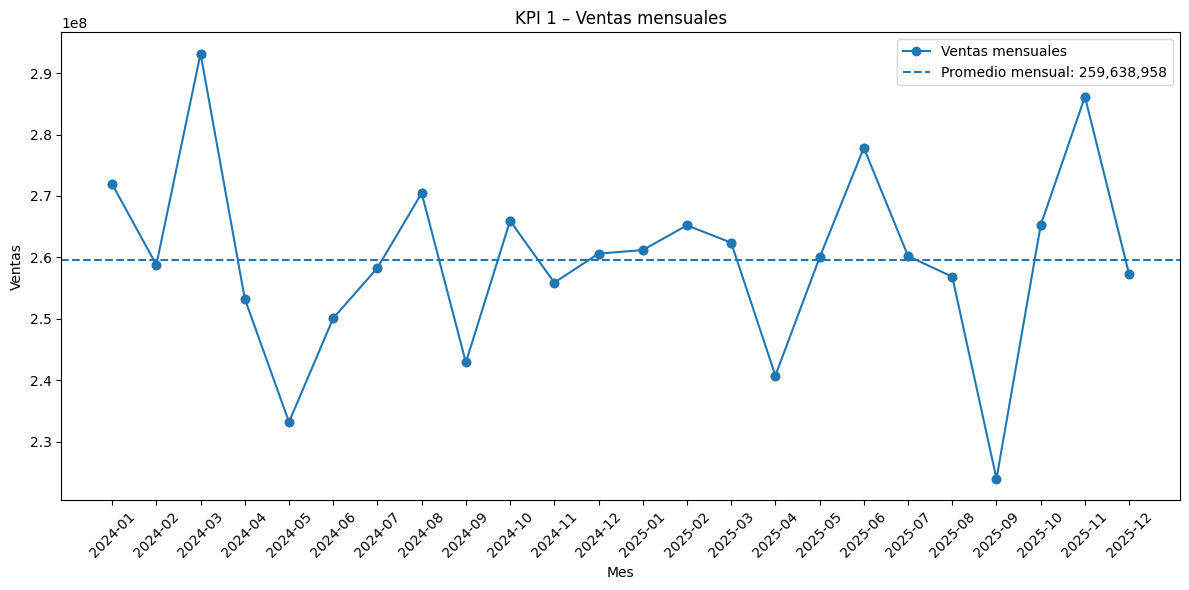

In [ ]:

# Agrupar por mes
kpi1 = df.groupby(df["Fecha"].dt.to_period("M"))["Ventas"].sum().reset_index()
kpi1["Fecha"] = kpi1["Fecha"].astype(str)

# Calcular promedio
promedio = kpi1["Ventas"].mean()

plt.figure(figsize=(12,6))

# Línea principal
plt.plot(kpi1["Fecha"], kpi1["Ventas"], marker="o", label="Ventas mensuales")

# Línea de promedio
plt.axhline(promedio, linestyle="--", label=f"Promedio mensual: {promedio:,.0f}")

# Marcar picos altos (mayores al promedio)
altos = kpi1[kpi1["Ventas"] > promedio]
plt.scatter(altos["Fecha"], altos["Ventas"])

# Marcar picos bajos (menores al promedio)
bajos = kpi1[kpi1["Ventas"] < promedio]
plt.scatter(bajos["Fecha"], bajos["Ventas"])

plt.title("KPI 1 – Ventas mensuales")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
kpi1.to_csv("kpi_1_ventas_mensuales.csv", index=False)


In [ ]:
#KPI 2 — Utilidad por categoría (TABLA)
kpi2 = df.groupby("Categoria")["Utilidad"].sum().reset_index()
kpi2



,Categoria,Utilidad
0,Alimentos,476801800
1,Higiene,852651000
2,Limpieza,327678500


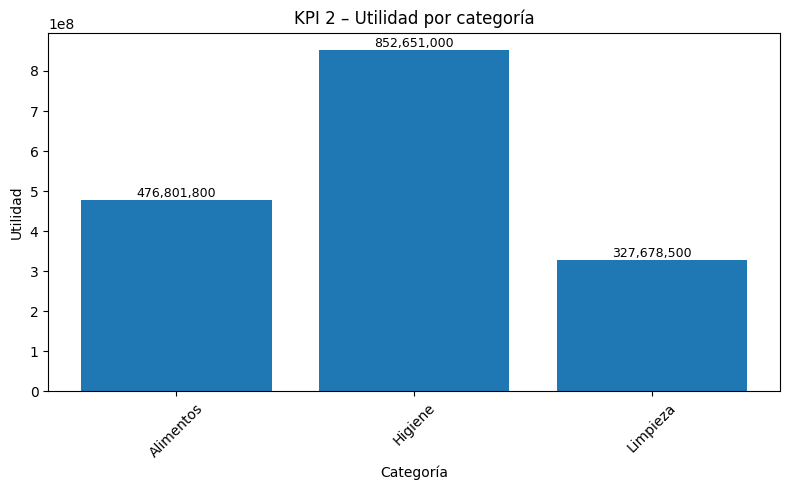

In [32]:

kpi2 = df.groupby("Categoria")["Utilidad"].sum().reset_index()

plt.figure(figsize=(8,5))
barras = plt.bar(kpi2["Categoria"], kpi2["Utilidad"])

plt.title("KPI 2 – Utilidad por categoría")
plt.xlabel("Categoría")
plt.ylabel("Utilidad")
plt.xticks(rotation=45)

# Agregar valor encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura,
             f"{altura:,.0f}",
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()



In [8]:
kpi2.to_csv("kpi_2_utilidad_categoria.csv", index=False)


In [27]:
#KPI 3 — Top 10 productos por ventas
kpi3 = df.groupby("Producto")["Ventas"].sum().reset_index()
kpi3 = kpi3.sort_values("Ventas", ascending=False).head(10)
kpi3


,Producto,Ventas
5,Papel Higienico,1763262000
6,Shampoo,1360710000
0,Aceite 900ml,1077240000
2,Detergente,662284000
1,Arroz 1kg,524320500
3,Galletitas,428155000
4,Lavandina,415363500


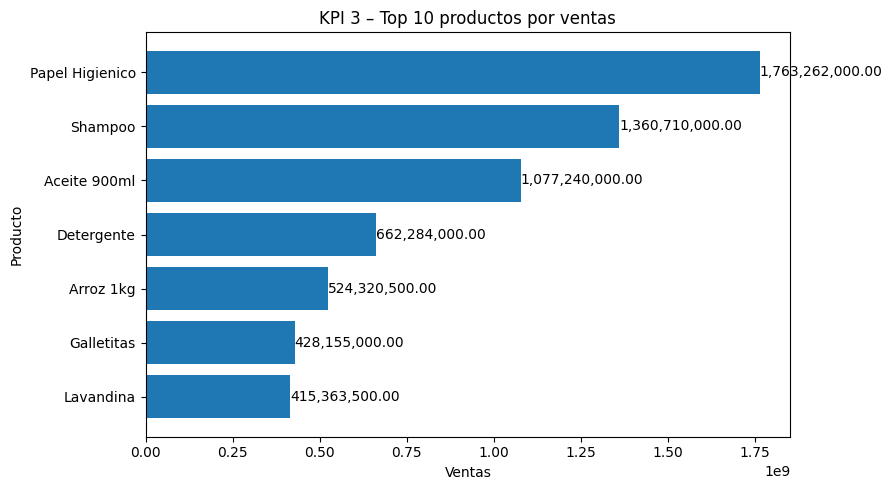

In [ ]:


plt.figure(figsize=(9,5))
barras = plt.barh(kpi3["Producto"], kpi3["Ventas"])
plt.title("KPI 3 – Top 10 productos por ventas")
plt.xlabel("Ventas")
plt.ylabel("Producto")
plt.gca().invert_yaxis()  # para que el mayor quede arriba

for barra in barras:
    ancho = barra.get_width()
    plt.text(ancho, barra.get_y() + barra.get_height()/2,
             f"{ancho:,.2f}",
             va="center")

plt.tight_layout()
plt.show()



In [11]:
kpi3.to_csv("kpi_3_top_productos.csv", index=False)


In [ ]:
#KPI 4 — Utilidad por canal 
kpi4 = df.groupby("Canal")["Utilidad"].sum().reset_index()
kpi4


,Canal,Utilidad
0,Almacen,552427900
1,Mayorista,582056300
2,Supermercado,522647100


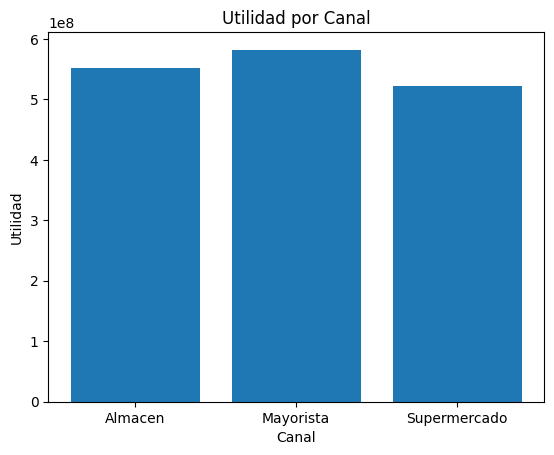

In [18]:
plt.figure()
plt.bar(kpi4["Canal"], kpi4["Utilidad"])
plt.title("Utilidad por Canal")
plt.xlabel("Canal")
plt.ylabel("Utilidad")
plt.show()


In [19]:
kpi4.to_csv("kpi_4_utilidad_canal.csv", index=False)


In [20]:
#KPI 5 — Margen promedio por categoría
kpi5 = df.groupby("Categoria")["Margen"].mean().reset_index()
kpi5


,Categoria,Margen
0,Alimentos,0.247523
1,Higiene,0.272414
2,Limpieza,0.308929


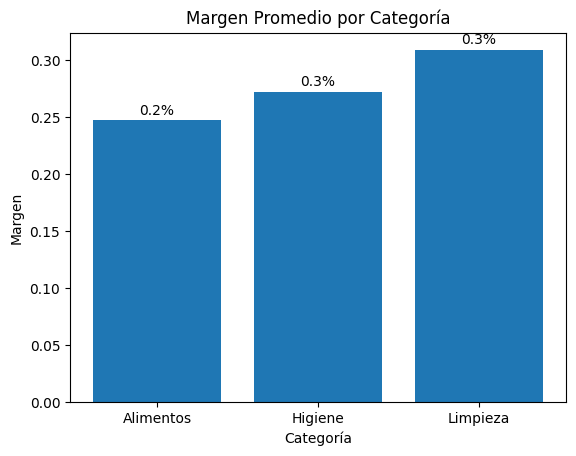

In [ ]:

plt.figure()
bars = plt.bar(kpi5["Categoria"], kpi5["Margen"])

# Agregar los valores de margen encima de cada barra
for bar in bars:
    altura = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # centro de la barra
        altura * 1.01,                    # un 1% por encima de la barra
        f"{altura:.1f}%",                 # texto con porcentaje
        ha='center',
        va='bottom'
    )

plt.title("Margen Promedio por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Margen")
plt.show()

In [22]:
kpi5.to_csv("kpi_5_margen_categoria.csv", index=False)
